In [3]:
import pandas as pd
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss, log_loss
import matplotlib.pyplot as plt
import sys
import os

# Get the absolute path of the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Add the parent directory to sys.path
sys.path.append(parent_dir)

import scripts.processing as processing


In [4]:
df = pd.read_csv("../data/submissions.csv")
eviction_df = processing.clean_for_eviction(df)
layoff_df = processing.clean_for_layoff(df)

In [9]:
# Define a function to calculate error metrics for each model
def compute_error_metrics(group):
    brier_score = brier_score_loss(group['truth'], group['prediction'])
    logloss = log_loss(group['truth'], group['prediction'])
    return pd.Series({'brier_score': brier_score, 'log_loss': logloss})

# Function to calculate custom calibration curve
def custom_calibration_curve(df, bins):
    temp_df = df.copy()
    temp_df.loc[:, 'bin'] = pd.cut(temp_df['prediction'], bins=bins, right=False, include_lowest=True)
    
    grouped = temp_df.groupby('bin', observed = False)
    calibration_data = grouped.agg(
        prob_pred=('prediction', 'mean'),
        frac_positives=('truth', 'mean'),
        count=('prediction', 'size')  # count the number of entries in each bin
    ).reset_index()
    
    return calibration_data


Model mb298:
          bin  count
0  [0.0, 0.2)   3744
1  [0.2, 1.0)   2606
Model NaijiaLiu:
          bin  count
0  [0.0, 0.2)   4490
1  [0.2, 1.0)   1861
Model hamidrezaomidvar:
          bin  count
0  [0.0, 0.2)   4490
1  [0.2, 1.0)   1861
Model Justajwu:
          bin  count
0  [0.0, 0.2)   4301
1  [0.2, 1.0)   2063
Model dremalt:
          bin  count
0  [0.0, 0.2)   4378
1  [0.2, 1.0)   1986
Model amaatouq:
          bin  count
0  [0.0, 0.2)   5028
1  [0.2, 1.0)   1336
Model malte:
          bin  count
0  [0.0, 0.2)   4633
1  [0.2, 1.0)   1731
Model lbb285:
          bin  count
0  [0.0, 0.2)   3717
1  [0.2, 1.0)   2647
Model kgenova:
          bin  count
0  [0.0, 0.2)   3854
1  [0.2, 1.0)   2499
Model spike_slab_team:
          bin  count
0  [0.0, 0.2)   1555
1  [0.2, 1.0)   1627


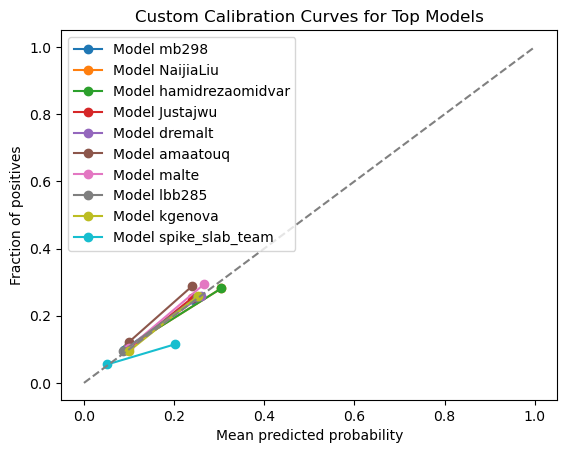

In [10]:
# Compute error metrics for each model
error_metrics = eviction_df.groupby('account', observed = False).apply(compute_error_metrics)

# Select top N models based on Brier score (or log_loss)
top_models = error_metrics.nsmallest(10, 'log_loss').index

bins = [0, 0.2, 1]
# Plot calibration curves for top models
fig, ax = plt.subplots()

for model in top_models:
    model_data = df[df['account'] == model]
    calibration_data = custom_calibration_curve(model_data, bins)
    ax.plot(calibration_data['prob_pred'], calibration_data['frac_positives'], marker='o', label=f'Model {model}')
    print(f"Model {model}:")
    print(calibration_data[['bin', 'count']])  # Print the count of predictions per bin for each model
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.set_xlabel('Mean predicted probability')
ax.set_ylabel('Fraction of positives')
ax.set_title('Custom Calibration Curves for Top Models')
ax.legend()

plt.show()

C:\Users\ewang\AppData\Local\Temp\ipykernel_10960\1671348659.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby('bin')
C:\Users\ewang\AppData\Local\Temp\ipykernel_10960\1671348659.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby('bin')
C:\Users\ewang\AppData\Local\Temp\ipykernel_10960\1671348659.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_d

Model Pentlandians:
          bin  count
0  [0.0, 0.2)   3570
1  [0.2, 1.0)   2794
Model the_Brit:
          bin  count
0  [0.0, 0.2)   4440
1  [0.2, 1.0)   1924
Model amaatouq:
          bin  count
0  [0.0, 0.2)   5028
1  [0.2, 1.0)   1336


C:\Users\ewang\AppData\Local\Temp\ipykernel_10960\1671348659.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby('bin')
C:\Users\ewang\AppData\Local\Temp\ipykernel_10960\1671348659.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby('bin')
C:\Users\ewang\AppData\Local\Temp\ipykernel_10960\1671348659.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_d

Model fw:
          bin  count
0  [0.0, 0.2)   4144
1  [0.2, 1.0)   2103
Model FormidableFamily:
          bin  count
0  [0.0, 0.2)   4258
1  [0.2, 1.0)   2077
Model malte:
          bin  count
0  [0.0, 0.2)   4633
1  [0.2, 1.0)   1731
Model lbb285:
          bin  count
0  [0.0, 0.2)   3717
1  [0.2, 1.0)   2647


C:\Users\ewang\AppData\Local\Temp\ipykernel_10960\1671348659.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby('bin')
C:\Users\ewang\AppData\Local\Temp\ipykernel_10960\1671348659.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby('bin')
C:\Users\ewang\AppData\Local\Temp\ipykernel_10960\1671348659.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_d

Model hamidrezaomidvar:
          bin  count
0  [0.0, 0.2)   4490
1  [0.2, 1.0)   1861
Model NaijiaLiu:
          bin  count
0  [0.0, 0.2)   4490
1  [0.2, 1.0)   1861
Model Tamkinat:
          bin  count
0  [0.0, 0.2)   4048
1  [0.2, 1.0)   2316


C:\Users\ewang\AppData\Local\Temp\ipykernel_10960\1671348659.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby('bin')


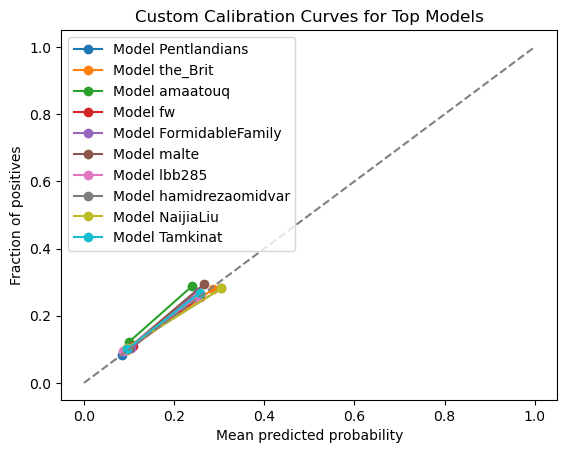

In [7]:
# Compute error metrics for each model
error_metrics = layoff_df.groupby('account', observed = False).apply(compute_error_metrics)

# Select top N models based on Brier score (or log_loss)
top_models = error_metrics.nsmallest(10, 'log_loss').index

bins = [0, 0.2, 1]
# Plot calibration curves for top models
fig, ax = plt.subplots()

for model in top_models:
    model_data = df[df['account'] == model]
    calibration_data = custom_calibration_curve(model_data, bins)
    ax.plot(calibration_data['prob_pred'], calibration_data['frac_positives'], marker='o', label=f'Model {model}')
    print(f"Model {model}:")
    print(calibration_data[['bin', 'count']])  # Print the count of predictions per bin for each model
ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
ax.set_xlabel('Mean predicted probability')
ax.set_ylabel('Fraction of positives')
ax.set_title('Custom Calibration Curves for Top Models')
ax.legend()

plt.show()